# The question to be answered/addressed in the below project--based on Twitter data--is, “Do Americans support U.S. President Donald Trump’s position in immigration and, specifically, what many cite as the separation of families as they try to enter cross the U.S. border? And do those opinions vary by geographic region?”


## First, we need to set up by installing the appropriate libraries and packages, authenticating, and establishing the Twitter API connection.

In [8]:
# importing the appropriate libraries and packages
import tweepy, json
from datetime import datetime, timedelta
import pandas as pd
import csv
from textblob import TextBlob
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

In [9]:
# my validation and authentication variables
access_token = "1011804601450991616-2yLNKkElMox9I5PuHYKBUa7Dj3OKrQ"
access_token_secret = "F9T4d3JSRM484xiToO1OWorKFaoaoo0wZn1bm9AJQEAOi"
consumer_key = "A6phvG9WMGMSR11uuXH5AD8N9"
consumer_secret = "9ILjLi15TP8fhb3XONaVUuYfRSlXNiGF1kDPijGDQOwrGHaqwp"

In [10]:
# creating authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# connecting to the Twitter API using the above authentication
api = tweepy.API(auth)

##  The queries and analyses follow:

In [31]:
#list of the 100 major U.S. cities taken from this Wikipedia page:   https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
cities_list = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Detroit', 'Jacksonville', 'Indianapolis', 'San Francisco', 'Columbus', 'Austin', 'Memphis', 'Fort Worth', 'Baltimore', 'Charlotte', 'El Paso', 'Boston', 'Seattle', 'Washington', 'Milwaukee', 'Denver', 'Louisville', 'Las Vegas', 'Nashville', 'Oklahoma City', 'Portland', 'Tucson', 'Albuquerque', 'Atlanta', 'Long Beach', 'Fresno', 'Sacramento', 'Mesa', 'Kansas City', 'Cleveland', 'Virginia Beach', 'Omaha', 'Miami', 'Oakland', 'Tulsa', 'Honolulu', 'Minneapolis', 'Colorado Springs', 'Arlington', 'Wichita', 'Raleigh', 'St. Louis', 'Santa Ana', 'Anaheim', 'Tampa', 'Cincinnati', 'Pittsburgh', 'Bakersfield', 'Aurora', 'Toledo', 'Riverside', 'Stockton', 'Corpus Christi', 'Newark', 'Anchorage', 'Buffalo', 'St. Paul', 'Lexington-Fayette', 'Plano', 'Fort Wayne', 'St. Petersburg', 'Glendale', 'Jersey City', 'Lincoln', 'Henderson', 'Chandler', 'Greensboro', 'Scottsdale', 'Baton Rouge', 'Birmingham', 'Norfolk', 'Madison', 'New Orleans', 'Chesapeake', 'Orlando', 'Garland', 'Hialeah', 'Laredo', 'Chula Vista', 'Lubbock', 'Reno', 'Akron', 'Durham', 'Rochester', 'Modesto', 'Montgomery', 'Fremont', 'Shreveport', 'Arlington', 'Glendale']

In [32]:
# a query to get the Twitter place_id (code) for each city

city_dict = {}
for city in cities_list:
    city_dict[city] = api.geo_search(query = city, wait_on_rate_limit=True, granularity = 'city')[0].id

In [33]:
city_dict

{'Akron': 'fef01a8cb0eacb64',
 'Albuquerque': '813a485b26b8dae2',
 'Anaheim': '0c2e6999105f8070',
 'Anchorage': '7a863bb88e5bb33c',
 'Arlington': '319ee7b36c9149da',
 'Atlanta': '8173485c72e78ca5',
 'Aurora': '249bc600a1b6bb6a',
 'Austin': 'c3f37afa9efcf94b',
 'Bakersfield': '960993b9cfdffda9',
 'Baltimore': 'c0b8e8dc81930292',
 'Baton Rouge': 'c7ef5f3368b68777',
 'Birmingham': '53b67b1d1cc81a51',
 'Boston': '67b98f17fdcf20be',
 'Buffalo': 'a307591cd0413588',
 'Chandler': '52445186970bafb3',
 'Charlotte': '512a8a4a4c4b4be0',
 'Chesapeake': '73d1c1c11b675932',
 'Chicago': '1d9a5370a355ab0c',
 'Chula Vista': '28ace6b8d6dbc3af',
 'Cincinnati': 'e444ecd51bd16ff3',
 'Cleveland': '0eb9676d24b211f1',
 'Colorado Springs': 'adc95f2911133646',
 'Columbus': '3df0e3eb1e91170b',
 'Corpus Christi': 'a3d770a00f15bcb1',
 'Dallas': '18810aa5b43e76c7',
 'Denver': 'b49b3053b5c25bf5',
 'Detroit': 'b463d3bd6064861b',
 'Durham': 'bced47a0c99c71d0',
 'El Paso': '6a0a3474d8c5113c',
 'Fort Wayne': '3877d6c8674

In [17]:
cityDict = {'Akron': 'fef01a8cb0eacb64',
 'Albuquerque': '813a485b26b8dae2',
 'Anaheim': '0c2e6999105f8070',
 'Anchorage': '7a863bb88e5bb33c',
 'Arlington': '319ee7b36c9149da',
 'Atlanta': '8173485c72e78ca5',
 'Aurora': '249bc600a1b6bb6a',
 'Austin': 'c3f37afa9efcf94b',
 'Bakersfield': '960993b9cfdffda9',
 'Baltimore': 'c0b8e8dc81930292',
 'Baton Rouge': 'c7ef5f3368b68777',
 'Birmingham': '53b67b1d1cc81a51',
 'Boston': '67b98f17fdcf20be',
 'Buffalo': 'a307591cd0413588',
 'Chandler': '52445186970bafb3',
 'Charlotte': '512a8a4a4c4b4be0',
 'Chesapeake': '73d1c1c11b675932',
 'Chicago': '1d9a5370a355ab0c',
 'Chula Vista': '28ace6b8d6dbc3af',
 'Cincinnati': 'e444ecd51bd16ff3',
 'Cleveland': '0eb9676d24b211f1',
 'Colorado Springs': 'adc95f2911133646',
 'Columbus': '3df0e3eb1e91170b',
 'Corpus Christi': 'a3d770a00f15bcb1',
 'Dallas': '18810aa5b43e76c7',
 'Denver': 'b49b3053b5c25bf5',
 'Detroit': 'b463d3bd6064861b',
 'Durham': 'bced47a0c99c71d0',
 'El Paso': '6a0a3474d8c5113c',
 'Fort Wayne': '3877d6c867447819',
 'Fort Worth': '42e46bc3663a4b5f',
 'Fremont': '30344aecffe6a491',
 'Fresno': '944c03c1d85ef480',
 'Garland': '7c01d867b8e8c494',
 'Glendale': '389e765d4de59bd2',
 'Greensboro': 'a6c257c61f294ec1',
 'Henderson': '0e2242eb8691df96',
 'Hialeah': '629f4a26fed69cd3',
 'Honolulu': 'c47c0bc571bf5427',
 'Houston': '1c69a67ad480e1b1',
 'Indianapolis': '018929347840059e',
 'Jacksonville': 'd5dbaf62e7106dc4',
 'Jersey City': 'b046074b1030a44d',
 'Kansas City': '9a974dfc8efb32a0',
 'Laredo': '4fd63188b772fc62',
 'Las Vegas': '5c2b5e46ab891f07',
 'Lexington-Fayette': '00ae272d6d0d28fe',
 'Lincoln': '3af2a75dbeb10500',
 'Long Beach': '01c060cf466c6ce3',
 'Los Angeles': '3b77caf94bfc81fe',
 'Louisville': '095534ad3107e0e6',
 'Lubbock': '3f3f6803f117606d',
 'Madison': 'e67427d9b4126602',
 'Memphis': 'f995a9bd45d4a867',
 'Mesa': '44d207663001f00b',
 'Miami': '04cb31bae3b3af93',
 'Milwaukee': '2a93711775303f90',
 'Minneapolis': '8e9665cec9370f0f',
 'Modesto': 'e41805d7248dbf1e',
 'Montgomery': '7f061ded71fdc974',
 'Nashville': '00ab941b685334e3',
 'New Orleans': 'dd3b100831dd1763',
 'New York': '27485069891a7938',
 'Newark': 'fa3435044b52ecc7',
 'Norfolk': 'b004be67b9fd6d8f',
 'Oakland': 'ab2f2fac83aa388d',
 'Oklahoma City': '9531d4e3bbafc09d',
 'Omaha': 'a84b808ce3f11719',
 'Orlando': '55b4f9e5c516e0b6',
 'Philadelphia': 'e4a0d228eb6be76b',
 'Phoenix': '5c62ffb0f0f3479d',
 'Pittsburgh': '946ccd22e1c9cda1',
 'Plano': '488da0de4c92ac8e',
 'Portland': 'ac88a4f17a51c7fc',
 'Raleigh': '161d2f18e3a0445a',
 'Reno': '4b25aded08900fd8',
 'Riverside': '6ba08e404aed471f',
 'Rochester': '2409d5aabed47f79',
 'Sacramento': 'b71fac2ee9792cbe',
 'San Antonio': '3df4f427b5a60fea',
 'San Diego': 'a592bd6ceb1319f7',
 'San Francisco': '5a110d312052166f',
 'San Jose': '7d62cffe6f98f349',
 'Santa Ana': '0562e9e53cddf6ec',
 'Scottsdale': '0a0de7bd49ef942d',
 'Seattle': '300bcc6e23a88361',
 'Shreveport': '4ec71fc3f2579572',
 'St. Louis': '0570f015c264cbd9',
 'St. Paul': '60e2c37980197297',
 'St. Petersburg': '5d231ed8656fcf5a',
 'Stockton': 'd98e7ce217ade2c5',
 'Tampa': 'dc62519fda13b4ec',
 'Toledo': '7068dd9474ab6973',
 'Tucson': '013379ee5729a5e6',
 'Tulsa': 'cb74aaf709812e0f',
 'Virginia Beach': '84229b03659050aa',
 'Washington': '01fbe706f872cb32',
 'Wichita': '1661ada9b2b18024'}

In [45]:
# creating empty lists (one for each city)

Akron = []
Albuquerque = []
Anaheim = []
Anchorage = []
Arlington = []
Atlanta = []
Aurora = []
Austin = []
Bakersfield = []       
Baltimore = []
Baton_Rouge = []
Birmingham = []
Boston = []
Buffalo = []
Chandler = []
Charlotte = []
Chesapeake = []
Chicago = []

In [67]:
# more empty lists for the cities

Chula_Vista = []
Cincinnati = []
Cleveland = []
Colorado_Springs = []
Columbus = []
Corpus_Christi = []
Dallas = []
Denver = []
Detroit = []
Durham = []
El_Paso = []
Fort_Wayne = []
Fort_Worth = []
Fremont = []
Fresno = []
Garland = []
Glendale = []
Greensboro = []
Henderson = []
Hialeah = []
Honolulu = []
Houston = []
Indianapolis = []
Jacksonville = []
Jersey_City = []
Kansas_City = []
Laredo = []
Las_Vegas = []
Lexington_Fayette = []
Lincoln = []
Long_Beach = []
Los_Angeles = []
Louisville = []
Lubbock = []
Madison = []
Memphis = []
Mesa = []
Miami = []
Milwaukee = []
Minneapolis = []
Modesto = []
Montgomery = []
Nashville = []
New_Orleans = []
New_York = []
Newark = []
Norfolk = []
Oakland = []
Oklahoma_City = []
Omaha = []
Orlando = []
Philadelphia = []
Phoenix = []
Pittsburgh = []
Plano = []
Portland = []
Raleigh = []
Reno = []
Riverside = []
Rochester = []
Sacramento = []
San_Antonio = []
San_Diego = []
San_Francisco = []
San_Jose = []
Santa_Ana = []
Scottsdale = []
Seattle = []
Shreveport = []
St_Louis = []
St_Paul = []
St_Petersburg = []
Stockton = []
Tampa = []
Toledo = []
Tucson = []
Tulsa = []
Virginia_Beach = []
Washington = []
Wichita = []

In [46]:
# the actual query string to search for these phrases of interested contained in the tweet text

q = '(immigration OR immigrants) AND (families OR family) AND (separate OR separation) AND trump)'

### Individual queries for each city that appends the results to the lists created above.

In [185]:
#Akron
cityID = 'fef01a8cb0eacb64'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Akron.append(tweet)   

In [51]:
#Albuquerque
cityID = '813a485b26b8dae2'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Albuquerque.append(tweet)  

In [52]:
#Anaheim
cityID = '0c2e6999105f8070'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Anaheim.append(tweet)  

In [53]:
#Anchorage
cityID = '7a863bb88e5bb33c'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Anchorage.append(tweet) 

In [54]:
#Arlington
cityID = '319ee7b36c9149da'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Arlington.append(tweet) 

In [55]:
#Atlanta
cityID = '8173485c72e78ca5'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Atlanta.append(tweet) 

In [57]:
#Aurora
cityID = '249bc600a1b6bb6a'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Aurora.append(tweet) 

In [58]:
#Austin
cityID = 'c3f37afa9efcf94b'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Austin.append(tweet) 

In [59]:
#Bakersfield
cityID = '960993b9cfdffda9'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Bakersfield.append(tweet) 

In [60]:
#Baltimore
cityID = 'c0b8e8dc81930292'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Baltimore.append(tweet) 

In [61]:
#Baton Rouge
cityID = 'c7ef5f3368b68777'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Baton_Rouge.append(tweet) 

In [62]:
#Birmingham
cityID = '53b67b1d1cc81a51'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Birmingham.append(tweet) 

In [63]:
#Boston
cityID = '67b98f17fdcf20be'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Boston.append(tweet) 

In [64]:
#Buffalo
cityID = 'a307591cd0413588'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Buffalo.append(tweet) 

In [65]:
#Chandler
cityID = '52445186970bafb3'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Chandler.append(tweet) 

In [66]:
#Charlotte
cityID = '512a8a4a4c4b4be0'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Charlotte.append(tweet) 

In [68]:
#Chesapeake
cityID = '73d1c1c11b675932'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Chesapeake.append(tweet) 

In [69]:
#Chicago
cityID = '1d9a5370a355ab0c'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Chicago.append(tweet) 

In [70]:
#Chula Vista
cityID = '28ace6b8d6dbc3af'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Chula_Vista.append(tweet) 

In [71]:
#Cincinnati
cityID = 'e444ecd51bd16ff3'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Cincinnati.append(tweet) 

In [72]:
#Cleveland': '0eb9676d24b211f1
cityID = '0eb9676d24b211f1'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Cleveland.append(tweet) 

In [74]:
#Colorado Springs': 'adc95f2911133646
cityID = 'adc95f2911133646'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Colorado_Springs.append(tweet) 

In [75]:
#'Columbus': '3df0e3eb1e91170b'
cityID = '3df0e3eb1e91170b'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Columbus.append(tweet) 

In [76]:
#Corpus Christi': 'a3d770a00f15bcb1'
cityID = 'a3d770a00f15bcb1'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Corpus_Christi.append(tweet) 

In [77]:
#Dallas': '18810aa5b43e76c7'
cityID = '18810aa5b43e76c7'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Dallas.append(tweet) 

In [78]:
#'Denver': 'b49b3053b5c25bf5'
cityID = 'b49b3053b5c25bf5'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Denver.append(tweet) 

In [79]:
#'Detroit': 'b463d3bd6064861b',
cityID = 'b463d3bd6064861b'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Detroit.append(tweet) 

In [80]:
#'Durham': 'bced47a0c99c71d0',
cityID = 'bced47a0c99c71d0'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Durham.append(tweet) 

In [81]:
#El Paso': '6a0a3474d8c5113c'
cityID = '6a0a3474d8c5113c'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        El_Paso.append(tweet) 

In [82]:
#Fort Wayne': '3877d6c867447819'
cityID = '3877d6c867447819'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Fort_Wayne.append(tweet) 

In [83]:
#Fort Worth': '42e46bc3663a4b5f'
cityID = '42e46bc3663a4b5f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Fort_Worth.append(tweet) 

In [84]:
#'Fremont': '30344aecffe6a491',
cityID = '30344aecffe6a491'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Fremont.append(tweet) 

In [85]:
#Fresno': '944c03c1d85ef480'
cityID = '944c03c1d85ef480'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Fresno.append(tweet) 

In [87]:
#Garland': '7c01d867b8e8c494'
cityID = '7c01d867b8e8c494'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Garland.append(tweet) 

In [88]:
#'Glendale': '389e765d4de59bd2'
cityID = '389e765d4de59bd2'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Glendale.append(tweet) 

In [89]:
#Greensboro': 'a6c257c61f294ec1'
cityID = 'a6c257c61f294ec1'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Greensboro.append(tweet) 

In [90]:
#Henderson': '0e2242eb8691df96'
cityID = '0e2242eb8691df96'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Henderson.append(tweet) 

In [91]:
#Hialeah': '629f4a26fed69cd3'
cityID = '629f4a26fed69cd3'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Hialeah.append(tweet) 

In [92]:
#Honolulu': 'c47c0bc571bf5427'
cityID = 'c47c0bc571bf5427'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Honolulu.append(tweet) 

In [93]:
#Houston': '1c69a67ad480e1b1'
cityID = '1c69a67ad480e1b1'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Houston.append(tweet) 

In [94]:
#Indianapolis': '018929347840059e'
cityID = '018929347840059e'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Indianapolis.append(tweet) 

In [95]:
#Jacksonville': 'd5dbaf62e7106dc4'
cityID = 'd5dbaf62e7106dc4'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Jacksonville.append(tweet) 

In [96]:
#Jersey City': 'b046074b1030a44d'
cityID = 'b046074b1030a44d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Jersey_City.append(tweet) 

In [97]:
#Kansas City': '9a974dfc8efb32a0'
cityID = '9a974dfc8efb32a0'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Kansas_City.append(tweet) 

In [98]:
#Laredo': '4fd63188b772fc62'
cityID = '4fd63188b772fc62'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Laredo.append(tweet) 

In [99]:
#Las Vegas': '5c2b5e46ab891f07'
cityID = '5c2b5e46ab891f07'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Las_Vegas.append(tweet) 

In [100]:
#Lexington-Fayette': '00ae272d6d0d28fe'
cityID = '00ae272d6d0d28fe'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Lexington_Fayette.append(tweet) 

In [101]:
#Lincoln': '3af2a75dbeb10500'
cityID = 'af2a75dbeb10500'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Lincoln.append(tweet) 

In [102]:
#Long Beach': '01c060cf466c6ce3'
cityID = '01c060cf466c6ce3'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Long_Beach.append(tweet) 

In [103]:
#Los Angeles': '3b77caf94bfc81fe'
cityID = '3b77caf94bfc81fe'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Los_Angeles.append(tweet) 

In [104]:
#'Louisville': '095534ad3107e0e6'
cityID = '095534ad3107e0e6'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Louisville.append(tweet) 

In [105]:
#'Lubbock': '3f3f6803f117606d'
cityID = '3f3f6803f117606d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Lubbock.append(tweet) 

In [107]:
#'Madison': 'e67427d9b4126602'
cityID = 'e67427d9b4126602'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Madison.append(tweet) 

In [108]:
#'Memphis': 'f995a9bd45d4a867'
cityID = 'f995a9bd45d4a867'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Memphis.append(tweet) 

In [109]:
#'Mesa': '44d207663001f00b'
cityID = '44d207663001f00b'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Mesa.append(tweet) 

In [110]:
#'Miami': '04cb31bae3b3af93'
cityID = '04cb31bae3b3af93'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Miami.append(tweet) 

In [111]:
#'Milwaukee': '2a93711775303f90'
cityID = '2a93711775303f90'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Milwaukee.append(tweet) 

In [112]:
#'Minneapolis': '8e9665cec9370f0f'
cityID = '8e9665cec9370f0f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Minneapolis.append(tweet) 

In [113]:
#'Modesto': 'e41805d7248dbf1e'
cityID = 'e41805d7248dbf1e'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Modesto.append(tweet) 

In [114]:
#'Montgomery': '7f061ded71fdc974',
cityID = '7f061ded71fdc974'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Montgomery.append(tweet) 

In [115]:
#'Nashville': '00ab941b685334e3'
cityID = '00ab941b685334e3'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Nashville.append(tweet) 

In [116]:
#'New Orleans': 'dd3b100831dd1763'
cityID = 'dd3b100831dd1763'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        New_Orleans.append(tweet) 

In [117]:
#'New York': '27485069891a7938'
cityID = '27485069891a7938'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        New_York.append(tweet) 

In [118]:
#'Newark': 'fa3435044b52ecc7'
cityID = 'fa3435044b52ecc7'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Newark.append(tweet) 

In [119]:
#'Norfolk': 'b004be67b9fd6d8f'
cityID = 'b004be67b9fd6d8f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Norfolk.append(tweet) 

In [120]:
#'Oakland': 'ab2f2fac83aa388d'
cityID = 'ab2f2fac83aa388d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Oakland.append(tweet) 

In [121]:
#'Oklahoma City': '9531d4e3bbafc09d'
cityID = '9531d4e3bbafc09d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Oklahoma_City.append(tweet) 

In [122]:
#'Omaha': 'a84b808ce3f11719'
cityID = 'a84b808ce3f11719'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Omaha.append(tweet) 

In [123]:
#'Orlando': '55b4f9e5c516e0b6'
cityID = '55b4f9e5c516e0b6'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Orlando.append(tweet) 

In [124]:
#'Philadelphia': 'e4a0d228eb6be76b'
cityID = 'e4a0d228eb6be76b'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Philadelphia.append(tweet) 

In [125]:
#'Phoenix': '5c62ffb0f0f3479d'
cityID ='5c62ffb0f0f3479d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Phoenix.append(tweet) 

In [126]:
#'Pittsburgh': '946ccd22e1c9cda1'
cityID = '946ccd22e1c9cda1'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Pittsburgh.append(tweet) 

In [127]:
#'Plano': '488da0de4c92ac8e'
cityID = '488da0de4c92ac8e'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Plano.append(tweet) 

In [128]:
#'Portland': 'ac88a4f17a51c7fc'
cityID = 'ac88a4f17a51c7fc'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Portland.append(tweet) 

In [129]:
#'Raleigh': '161d2f18e3a0445a'
cityID = '161d2f18e3a0445a'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Raleigh.append(tweet) 

In [130]:
# 'Reno': '4b25aded08900fd8'
cityID =  '4b25aded08900fd8'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Reno.append(tweet) 

In [131]:
#'Riverside': '6ba08e404aed471f',
cityID = '6ba08e404aed471f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Riverside.append(tweet) 

In [132]:
#'Rochester': '2409d5aabed47f79'
cityID = '2409d5aabed47f79'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Rochester.append(tweet) 

In [133]:
#'Sacramento': 'b71fac2ee9792cbe'
cityID = 'b71fac2ee9792cbe'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Sacramento.append(tweet) 

In [134]:
#'San Antonio': '3df4f427b5a60fea'
cityID = '3df4f427b5a60fea'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        San_Antonio.append(tweet) 

In [135]:
#'San Diego': 'a592bd6ceb1319f7'
cityID = 'a592bd6ceb1319f7'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        San_Diego.append(tweet) 

In [136]:
#'San Francisco': '5a110d312052166f'
cityID =  '5a110d312052166f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        San_Francisco.append(tweet) 

In [137]:
#'San Jose': '7d62cffe6f98f349'
cityID = '7d62cffe6f98f349'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        San_Jose.append(tweet) 

In [138]:
#'Santa Ana': '0562e9e53cddf6ec'
cityID = '0562e9e53cddf6ec'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Santa_Ana.append(tweet) 

In [139]:
#'Scottsdale': '0a0de7bd49ef942d'
cityID = '0a0de7bd49ef942d'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Scottsdale.append(tweet) 

In [140]:
#'Seattle': '300bcc6e23a88361'
cityID = '300bcc6e23a88361'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Seattle.append(tweet) 

In [142]:
# 'Shreveport': '4ec71fc3f2579572'
cityID =  '4ec71fc3f2579572'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
         Shreveport.append(tweet) 

In [143]:
#'St. Louis': '0570f015c264cbd9',
cityID = '0570f015c264cbd9'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        St_Louis.append(tweet) 

In [144]:
#'St. Paul': '60e2c37980197297'
cityID = '60e2c37980197297'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        St_Paul.append(tweet) 

In [145]:
#'St. Petersburg': '5d231ed8656fcf5a'
cityID = '5d231ed8656fcf5a'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        St_Petersburg.append(tweet) 

In [146]:
#'Stockton': 'd98e7ce217ade2c5'
cityID = 'd98e7ce217ade2c5'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Stockton.append(tweet) 

In [147]:
#'Tampa': 'dc62519fda13b4ec'
cityID = 'dc62519fda13b4ec'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Tampa.append(tweet) 

In [148]:
#'Toledo': '7068dd9474ab6973'
cityID = '7068dd9474ab6973'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Toledo.append(tweet) 

In [149]:
#'Tucson': '013379ee5729a5e6'
cityID = '013379ee5729a5e6'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Tucson.append(tweet) 

In [150]:
#'Tulsa': 'cb74aaf709812e0f'
cityID = 'cb74aaf709812e0f'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Tulsa.append(tweet) 

In [151]:
#'Virginia Beach': '84229b03659050aa'
cityID = '84229b03659050aa'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Virginia_Beach.append(tweet) 

In [152]:
#'Washington': '01fbe706f872cb32'
cityID = '01fbe706f872cb32'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Washington.append(tweet) 

In [153]:
#'Wichita': '1661ada9b2b18024'
cityID = '1661ada9b2b18024'
for tweet in tweepy.Cursor(api.search, q=q, contained_within=cityID, wait_on_rate_limit=True, lang="en").items(500):    
        Wichita.append(tweet) 

In [259]:
# function to convert the lists to DataFrames

def toDataFrame(tweets):
    #this function selects specific values/columns from the original JSON and adds them as DataFrame columns.
    df = pd.DataFrame()
    df['tweetID'] = [tweet.id for tweet in tweets]
    df['tweetText'] = [tweet.text for tweet in tweets]
    df['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    df['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    df['tweetSource'] = [tweet.source for tweet in tweets]
    df['tweetCreated'] = [tweet.created_at for tweet in tweets]
    df['userID'] = [tweet.user.id for tweet in tweets]
    df['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    df['userName'] = [tweet.user.name for tweet in tweets]
    df['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    df['userDesc'] = [tweet.user.description for tweet in tweets]
    df['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    df['userFollowingCt'] = [tweet.user.friends_count for tweet in tweets]
    #df['userLocation'] = [tweet.user.location for tweet in tweets]
    df['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    df['coordinates'] = [tweet.coordinates for tweet in tweets]
    df['geolocation'] = [tweet.geo for tweet in tweets]
    df['place'] = [tweet.place for tweet in tweets]
    return df


In [260]:
# creating a DataFrame for each individual location

Akrondf = toDataFrame(Akron)
Albuquerquedf = toDataFrame(Albuquerque)
Anaheimdf = toDataFrame(Anaheim)
Anchoragedf = toDataFrame(Anchorage)
Arlingtondf = toDataFrame(Arlington)
Atlantadf = toDataFrame(Atlanta)
Auroradf = toDataFrame(Aurora)
Austindf = toDataFrame(Austin)
Bakersfielddf = toDataFrame(Bakersfield)       
Baltimoredf = toDataFrame(Baltimore)
Baton_Rougedf = toDataFrame(Baton_Rouge)
Birminghamdf = toDataFrame(Birmingham)
Bostondf = toDataFrame(Boston)
Buffalodf = toDataFrame(Buffalo)
Chandlerdf = toDataFrame(Chandler)
Charlottedf = toDataFrame(Charlotte)
Chesapeakedf = toDataFrame(Chesapeake)
Chicagodf = toDataFrame(Chicago)
Chula_Vistadf = toDataFrame(Chula_Vista)
Cincinnatidf = toDataFrame(Cincinnati)
Clevelanddf = toDataFrame(Cleveland)
Colorado_Springsdf = toDataFrame(Colorado_Springs)
Columbusdf = toDataFrame(Columbus)
Corpus_Christidf = toDataFrame(Corpus_Christi)
Dallasdf = toDataFrame(Dallas)
Denverdf = toDataFrame(Denver)
Detroitdf = toDataFrame(Detroit)
Durhamdf = toDataFrame(Durham)
El_Pasodf = toDataFrame(El_Paso)
Fort_Waynedf = toDataFrame(Fort_Wayne)
Fort_Worthdf = toDataFrame(Fort_Worth)
Fremontdf = toDataFrame(Fremont)
Fresnodf = toDataFrame(Fresno)
Garlanddf = toDataFrame(Garland)
Glendaledf = toDataFrame(Glendale)
Greensborodf = toDataFrame(Greensboro)
Hendersondf = toDataFrame(Henderson)
Hialeahdf = toDataFrame(Hialeah)
Honoluludf = toDataFrame(Honolulu)
Houstondf = toDataFrame(Houston)
Indianapolisdf = toDataFrame(Indianapolis)
Jacksonvilledf = toDataFrame(Jacksonville)
Jersey_Citydf = toDataFrame(Jersey_City)
Kansas_Citydf = toDataFrame(Kansas_City)
Laredodf = toDataFrame(Laredo)
Las_Vegasdf = toDataFrame(Las_Vegas)
Lexington_Fayettedf = toDataFrame(Lexington_Fayette)
Lincolndf = toDataFrame(Lincoln)
Long_Beachdf = toDataFrame(Long_Beach)
Los_Angelesdf = toDataFrame(Los_Angeles)
Louisvilledf = toDataFrame(Louisville)
Lubbockdf = toDataFrame(Lubbock)
Madisondf = toDataFrame(Madison)
Memphisdf = toDataFrame(Memphis)
Mesadf = toDataFrame(Mesa)
Miamidf = toDataFrame(Miami)
Milwaukeedf = toDataFrame(Milwaukee)
Minneapolisdf = toDataFrame(Minneapolis)
Modestodf = toDataFrame(Modesto)
Montgomerydf = toDataFrame(Montgomery)
Nashvilledf = toDataFrame(Nashville)
New_Orleansdf = toDataFrame(New_Orleans)
New_Yorkdf = toDataFrame(New_York)
Newarkdf = toDataFrame(Newark)
Norfolkdf = toDataFrame(Norfolk)
Oaklanddf = toDataFrame(Oakland)
Oklahoma_Citydf = toDataFrame(Oklahoma_City)
Omahadf = toDataFrame(Omaha)
Orlandodf = toDataFrame(Orlando)
Philadelphiadf = toDataFrame(Philadelphia)
Phoenixdf = toDataFrame(Phoenix)
Pittsburghdf = toDataFrame(Pittsburgh)
Planodf = toDataFrame(Plano)
Portlanddf = toDataFrame(Portland)
Raleighdf = toDataFrame(Raleigh)
Renodf = toDataFrame(Reno)
Riversidedf = toDataFrame(Riverside)
Rochesterdf = toDataFrame(Rochester)
Sacramentodf = toDataFrame(Sacramento)
San_Antoniodf = toDataFrame(San_Antonio)
San_Diegodf = toDataFrame(San_Diego)
San_Franciscodf = toDataFrame(San_Francisco)
San_Josedf = toDataFrame(San_Jose)
Santa_Anadf = toDataFrame(Santa_Ana)
Scottsdaledf = toDataFrame(Scottsdale)
Seattledf = toDataFrame(Seattle)
Shreveportdf = toDataFrame(Shreveport)
St_Louisdf = toDataFrame(St_Louis)
St_Pauldf = toDataFrame(St_Paul)
St_Petersburgdf = toDataFrame(St_Petersburg)
Stocktondf = toDataFrame(Stockton)
Tampadf = toDataFrame(Tampa)
Toledodf = toDataFrame(Toledo)
Tucsondf = toDataFrame(Tucson)
Tulsadf = toDataFrame(Tulsa)
Virginia_Beachdf = toDataFrame(Virginia_Beach)
Washingtondf = toDataFrame(Washington)
Wichitadf = toDataFrame(Wichita)

In [261]:
# adding a column to each DataFrame to reflect the City

Akrondf['cityname'] = 'Akron'
Albuquerquedf['cityname'] = 'Albuquerque'
Anaheimdf['cityname'] = 'Anaheim'
Anchoragedf['cityname'] = 'Anchorage'
Arlingtondf['cityname'] = 'Arlington'
Atlantadf['cityname'] = 'Atlanta'
Auroradf['cityname'] = 'Aurora'
Austindf['cityname'] = 'Austin'
Bakersfielddf['cityname'] = 'Bakersfield'      
Baltimoredf['cityname'] = 'Baltimore'
Baton_Rougedf['cityname'] = 'Baton Rouge'
Birminghamdf['cityname'] = 'Birmingham'
Bostondf['cityname'] = 'Boston'
Buffalodf['cityname'] = 'Buffalo'
Chandlerdf['cityname'] = 'Chandler'
Charlottedf['cityname'] = 'Charlotte'
Chesapeakedf['cityname'] = 'Chesapeake'
Chicagodf['cityname'] = 'Chicago'
Chula_Vistadf['cityname'] = 'Chula Vista'
Cincinnatidf['cityname'] = 'Cincinnati'
Clevelanddf['cityname'] = 'Cleveland'
Colorado_Springsdf['cityname'] = 'Colorado Springs'
Columbusdf['cityname'] = 'Columbus'
Corpus_Christidf['cityname'] = 'Corpus Christi'
Dallasdf['cityname'] = 'Dallas'
Denverdf['cityname'] = 'Denver'
Detroitdf['cityname'] = 'Detroit'
Durhamdf['cityname'] = 'Durham'
El_Pasodf['cityname'] = 'El_Paso'
Fort_Waynedf['cityname'] = 'Fort Wayne'
Fort_Worthdf['cityname'] = 'Fort Worth'
Fremontdf['cityname'] = 'Fremont'
Fresnodf['cityname'] = 'Fresno'
Garlanddf['cityname'] = 'Garland'
Glendaledf['cityname'] = 'Glendale'
Greensborodf['cityname'] = 'Greensboro'
Hendersondf['cityname'] = 'Henderson'
Hialeahdf['cityname'] = 'Hialeah'
Honoluludf['cityname'] = 'Honolulu'
Houstondf['cityname'] = 'Houston'
Indianapolisdf['cityname'] = 'Indianapolis'
Jacksonvilledf['cityname'] = 'Jacksonville'
Jersey_Citydf['cityname'] = 'Jersey City'
Kansas_Citydf['cityname'] = 'Kansas City'
Laredodf['cityname'] = 'Laredo'
Las_Vegasdf['cityname'] = 'Las Vegas'
Lexington_Fayettedf['cityname'] = 'Lexington-Fayette'
Lincolndf['cityname'] = 'Lincoln'
Long_Beachdf['cityname'] = 'Long Beach'
Los_Angelesdf['cityname'] = 'Los Angeles'
Louisvilledf['cityname'] = 'Louisville'
Lubbockdf['cityname'] = 'Lubbock'
Madisondf['cityname'] = 'Madison'
Memphisdf['cityname'] = 'Memphis'
Mesadf['cityname'] = 'Mesa'
Miamidf['cityname'] = 'Miami'
Milwaukeedf['cityname'] = 'Milwaukee'
Minneapolisdf['cityname'] = 'Minneapolis'
Modestodf['cityname'] ='Modesto'
Montgomerydf['cityname'] = 'Montgomery'
Nashvilledf['cityname'] = 'Nashville'
New_Orleansdf['cityname'] = 'New Orleans'
New_Yorkdf['cityname'] = 'New York'
Newarkdf['cityname'] = 'Newark'
Norfolkdf['cityname'] = 'Norfolk'
Oaklanddf['cityname'] = 'Oakland'
Oklahoma_Citydf['cityname'] = 'Oklahoma City'
Omahadf['cityname'] = 'Omaha'
Orlandodf['cityname'] = 'Orlando'
Philadelphiadf['cityname'] = 'Philadelphia'
Phoenixdf['cityname'] = 'Phoenix'
Pittsburghdf['cityname'] = 'Pittsburgh'
Planodf['cityname'] = 'Plano'
Portlanddf['cityname'] = 'Portland'
Raleighdf['cityname'] = 'Raleigh'
Renodf['cityname'] = 'Reno'
Riversidedf['cityname'] = 'Riverside'
Rochesterdf['cityname'] = 'Rochester'
Sacramentodf['cityname'] = 'Sacramento'
San_Antoniodf['cityname'] = 'San Antonio'
San_Diegodf['cityname'] = 'San Diego'
San_Franciscodf['cityname'] = 'San Francisco'
San_Josedf['cityname'] = 'San Jose'
Santa_Anadf['cityname'] = 'Santa Ana'
Scottsdaledf['cityname'] = 'Scottsdale'
Seattledf['cityname'] = 'Seattle'
Shreveportdf['cityname'] = 'Shreveport'
St_Louisdf['cityname'] = 'St. Louis'
St_Pauldf['cityname'] = 'St. Paul'
St_Petersburgdf['cityname'] = 'St. Petersburg'
Stocktondf['cityname'] = 'Stockton'
Tampadf['cityname'] = 'Tampa'
Toledodf['cityname'] = 'Toledo'
Tucsondf['cityname'] = 'Tucson'
Tulsadf['cityname'] = 'Tulsa'
Virginia_Beachdf['cityname'] = 'Virginia Beach'
Washingtondf['cityname'] = 'Washington'
Wichitadf['cityname'] = 'Wichita'

In [262]:
# adding a column to each DataFrame to reflect the State

Akrondf['statename'] = 'Ohio'
Albuquerquedf['statename'] = 'New Mexico'
Anaheimdf['statename'] = 'California'
Anchoragedf['statename'] = 'Alaska'
Arlingtondf['statename'] = 'Texas'
Atlantadf['statename'] = 'Georgia'
Auroradf['statename'] = 'Colorado'
Austindf['statename'] = 'Texas'
Bakersfielddf['statename'] = 'California'      
Baltimoredf['statename'] = 'Maryland'
Baton_Rougedf['statename'] = 'Louisiana'
Birminghamdf['statename'] = 'Alabama'
Bostondf['statename'] = 'Massachusetts'
Buffalodf['statename'] = 'New York'
Chandlerdf['statename'] = 'Arizona'
Charlottedf['statename'] = 'North Carolina'
Chesapeakedf['statename'] = 'Virginia'
Chicagodf['statename'] = 'Illinois'
Chula_Vistadf['statename'] = 'California'
Cincinnatidf['statename'] = 'Ohio'
Clevelanddf['statename'] = 'Ohio'
Colorado_Springsdf['statename'] = 'Colorado'
Columbusdf['statename'] = 'Ohio'
Corpus_Christidf['statename'] = 'Texas'
Dallasdf['statename'] = 'Texas'
Denverdf['statename'] = 'Colorado'
Detroitdf['statename'] = 'Michigan'
Durhamdf['statename'] = 'North Carolina'
El_Pasodf['statename'] = 'Texas'
Fort_Waynedf['statename'] = 'Indiana'
Fort_Worthdf['statename'] = 'Texas'
Fremontdf['statename'] = 'California'
Fresnodf['statename'] = 'California'
Garlanddf['statename'] = 'Texas'
Glendaledf['statename'] = 'Arizona'
Greensborodf['statename'] = 'North Carolina'
Hendersondf['statename'] = 'Nevada'
Hialeahdf['statename'] = 'Florida'
Honoluludf['statename'] = 'Hawaii'
Houstondf['statename'] = 'Texas'
Indianapolisdf['statename'] = 'Indianapolis'
Jacksonvilledf['statename'] = 'Florida'
Jersey_Citydf['statename'] = 'New Jersey'
Kansas_Citydf['statename'] = 'Missouri'
Laredodf['statename'] = 'Texas'
Las_Vegasdf['statename'] = 'Nevada'
Lexington_Fayettedf['statename'] = 'Kentucky'
Lincolndf['statename'] = 'Nebraska'
Long_Beachdf['statename'] = 'California'
Los_Angelesdf['statename'] = 'California'
Louisvilledf['statename'] = 'Kentucky'
Lubbockdf['statename'] = 'Texas'
Madisondf['statename'] = 'Wisconsin'
Memphisdf['statename'] = 'Tennessee'
Mesadf['statename'] = 'Arizona'
Miamidf['statename'] = 'Florida'
Milwaukeedf['statename'] = 'Wisconsin'
Minneapolisdf['statename'] = 'Minnesota'
Modestodf['statename'] = 'California'
Montgomerydf['statename'] = 'Alabama'
Nashvilledf['statename'] = 'Tennessee'
New_Orleansdf['statename'] = 'Louisiana'
New_Yorkdf['statename'] = 'New York'
Newarkdf['statename'] = 'New Jersey'
Norfolkdf['statename'] = 'Virginia'
Oaklanddf['statename'] = 'California'
Oklahoma_Citydf['statename'] = 'Oklahoma'
Omahadf['statename'] = 'Nebraska'
Orlandodf['statename'] = 'Florida'
Philadelphiadf['statename'] = 'Pennsylvania'
Phoenixdf['statename'] = 'Arizona'
Pittsburghdf['statename'] = 'Pennsylvania'
Planodf['statename'] = 'Texas'
Portlanddf['statename'] = 'Oregon'
Raleighdf['statename'] = 'North Carolina'
Renodf['statename'] = 'Nevada'
Riversidedf['statename'] = 'California'
Rochesterdf['statename'] = 'New York'
Sacramentodf['statename'] = 'California'
San_Antoniodf['statename'] = 'Texas'
San_Diegodf['statename'] = 'California'
San_Franciscodf['statename'] = 'California'
San_Josedf['statename'] = 'California'
Santa_Anadf['statename'] = 'California'
Scottsdaledf['statename'] = 'Arizona'
Seattledf['statename'] = 'Washington'
Shreveportdf['statename'] = 'Louisiana'
St_Louisdf['statename'] = 'Missouri'
St_Pauldf['statename'] = 'Minnesota'
St_Petersburgdf['statename'] = 'Florida'
Stocktondf['statename'] = 'California'
Tampadf['statename'] = 'Florida'
Toledodf['statename'] = 'Ohio'
Tucsondf['statename'] = 'Arizona'
Tulsadf['statename'] = 'Oklahoma'
Virginia_Beachdf['statename'] = 'Virginia'
Washingtondf['statename'] = 'District of Columbia'
Wichitadf['statename'] = 'Kansas'

In [263]:
# adding a column to each DataFrame to reflect the Region

Akrondf['region'] = 'Midwest'
Albuquerquedf['region'] = 'West'
Anaheimdf['region'] = 'West'
Anchoragedf['region'] = 'West'
Arlingtondf['region'] = 'South'
Atlantadf['region'] = 'South'
Auroradf['region'] = 'West'
Austindf['region'] = 'South'
Bakersfielddf['region'] = 'West'      
Baltimoredf['region'] = 'Northeast'
Baton_Rougedf['region'] = 'South'
Birminghamdf['region'] = 'South'
Bostondf['region'] = 'Northeast'
Buffalodf['region'] = 'Northeast'
Chandlerdf['region'] = 'West'
Charlottedf['region'] = 'South'
Chesapeakedf['region'] = 'South'
Chicagodf['region'] = 'Northeast'
Chula_Vistadf['region'] = 'West'
Cincinnatidf['region'] = 'Midwest'
Clevelanddf['region'] = 'Midwest'
Colorado_Springsdf['region'] = 'West'
Columbusdf['region'] = 'Northeast'
Corpus_Christidf['region'] = 'South'
Dallasdf['region'] = 'South'
Denverdf['region'] = 'West'
Detroitdf['region'] = 'Midwest'
Durhamdf['region'] = 'South'
El_Pasodf['region'] = 'South'
Fort_Waynedf['region'] = 'Midwest'
Fort_Worthdf['region'] = 'South'
Fremontdf['region'] = 'West'
Fresnodf['region'] = 'West'
Garlanddf['region'] = 'South'
Glendaledf['region'] = 'West'
Greensborodf['region'] = 'South'
Hendersondf['region'] = 'West'
Hialeahdf['region'] = 'South'
Honoluludf['region'] = 'West'
Houstondf['region'] = 'South'
Indianapolisdf['region'] = 'Midwest'
Jacksonvilledf['region'] = 'South'
Jersey_Citydf['region'] = 'Northeast'
Kansas_Citydf['region'] = 'Midwest'
Laredodf['region'] = 'South'
Las_Vegasdf['region'] = 'West'
Lexington_Fayettedf['region'] = 'South'
Lincolndf['region'] = 'Midwest'
Long_Beachdf['region'] = 'West'
Los_Angelesdf['region'] = 'West'
Louisvilledf['region'] = 'South'
Lubbockdf['region'] = 'South'
Madisondf['region'] = 'Midwest'
Memphisdf['region'] = 'South'
Mesadf['region'] = 'West'
Miamidf['region'] = 'South'
Milwaukeedf['region'] = 'Midwest'
Minneapolisdf['region'] = 'Midwest'
Modestodf['region'] = 'West'
Montgomerydf['region'] = 'South'
Nashvilledf['region'] = 'South'
New_Orleansdf['region'] = 'South'
New_Yorkdf['region'] = 'Northeast'
Newarkdf['region'] = 'Northeast'
Norfolkdf['region'] = 'South'
Oaklanddf['region'] = 'West'
Oklahoma_Citydf['region'] = 'South'
Omahadf['region'] = 'Midwest'
Orlandodf['region'] = 'South'
Philadelphiadf['region'] = 'Northeast'
Phoenixdf['region'] = 'West'
Pittsburghdf['region'] = 'Northeast'
Planodf['region'] = 'South'
Portlanddf['region'] = 'West'
Raleighdf['region'] = 'South'
Renodf['region'] = 'West'
Riversidedf['region'] = 'West'
Rochesterdf['region'] = 'Northeast'
Sacramentodf['region'] = 'West'
San_Antoniodf['region'] = 'South'
San_Diegodf['region'] = 'West'
San_Franciscodf['region'] = 'West'
San_Josedf['region'] = 'West'
Santa_Anadf['region'] = 'West'
Scottsdaledf['region'] = 'West'
Seattledf['region'] = 'West'
Shreveportdf['region'] = 'South'
St_Louisdf['region'] = 'Midwest'
St_Pauldf['region'] = 'Midwest'
St_Petersburgdf['region'] = 'South'
Stocktondf['region'] = 'West'
Tampadf['region'] = 'South'
Toledodf['region'] = 'Midwest'
Tucsondf['region'] = 'West'
Tulsadf['region'] = 'South'
Virginia_Beachdf['region'] = 'South'
Washingtondf['region'] = 'Northeast'
Wichitadf['region'] = 'Midwest'

In [264]:
fulldf = pd.concat([Akrondf, Albuquerquedf, Anaheimdf, Anchoragedf, Arlingtondf, Atlantadf, Auroradf, Austindf, Bakersfielddf, Baltimoredf, Baton_Rougedf, Birminghamdf, Bostondf, Buffalodf, Chandlerdf, Charlottedf, Chesapeakedf, Chicagodf, Chula_Vistadf, Cincinnatidf, Clevelanddf, Colorado_Springsdf, Columbusdf, Corpus_Christidf, Dallasdf, Denverdf, Detroitdf, Durhamdf, El_Pasodf, Fort_Waynedf, Fort_Worthdf, Fremontdf, Fresnodf, Garlanddf, Glendaledf, Greensborodf, Hendersondf, Hialeahdf, Honoluludf, Houstondf, Indianapolisdf, Jacksonvilledf, Jersey_Citydf, Kansas_Citydf, Laredodf, Las_Vegasdf, Lexington_Fayettedf, Lincolndf, Long_Beachdf, Los_Angelesdf, Louisvilledf, Lubbockdf, Madisondf, Memphisdf, Mesadf, Miamidf, Milwaukeedf, Minneapolisdf, Modestodf, Montgomerydf, Nashvilledf, New_Orleansdf, New_Yorkdf, Newarkdf, Norfolkdf, Oaklanddf, Oklahoma_Citydf, Omahadf, Orlandodf, Philadelphiadf, Phoenixdf, Pittsburghdf, Planodf, Portlanddf, Raleighdf, Renodf, Riversidedf, Rochesterdf, Sacramentodf, San_Antoniodf, San_Diegodf, San_Franciscodf, San_Josedf, Santa_Anadf, Scottsdaledf, Seattledf, Shreveportdf, St_Louisdf, St_Pauldf, St_Petersburgdf, Stocktondf, Tampadf, Toledodf, Tucsondf, Tulsadf, Virginia_Beachdf, Washingtondf, Wichitadf])

In [265]:
# Saving the DataFrame as a .csv file.

fulldf.to_csv('FullResults.csv', encoding='utf-8', index=False)

In [267]:
fulldf.describe()

,tweetID,tweetRetweetCt,tweetFavoriteCt,userID,userFollowerCt,userFollowingCt
count,4.900000e+04,49000.000000,49000.000000,4.900000e+04,4.900000e+04,49000.000000
mean,1.016833e+18,759.184531,0.384020,2.289858e+17,3.334917e+03,1983.962898
std,1.741703e+13,928.344405,17.177461,3.806919e+17,3.297735e+04,5273.180148
min,1.016789e+18,0.000000,0.000000,1.337371e+06,0.000000e+00,0.000000
25%,1.016820e+18,436.000000,0.000000,1.075637e+08,1.320000e+02,243.000000
50%,1.016827e+18,565.000000,0.000000,7.606536e+08,3.660000e+02,582.000000
75%,1.016843e+18,645.000000,0.000000,7.253859e+17,1.347000e+03,1639.000000
max,1.016910e+18,13041.000000,986.000000,1.016821e+18,1.498693e+06,101446.000000


In [268]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 0 to 499
Data columns (total 20 columns):
tweetID            49000 non-null int64
tweetText          49000 non-null object
tweetRetweetCt     49000 non-null int64
tweetFavoriteCt    49000 non-null int64
tweetSource        49000 non-null object
tweetCreated       49000 non-null datetime64[ns]
userID             49000 non-null int64
userScreen         49000 non-null object
userName           49000 non-null object
userCreateDt       49000 non-null datetime64[ns]
userDesc           49000 non-null object
userFollowerCt     49000 non-null int64
userFollowingCt    49000 non-null int64
userTimezone       0 non-null object
coordinates        0 non-null object
geolocation        0 non-null object
place              146 non-null object
cityname           49000 non-null object
statename          49000 non-null object
region             49000 non-null object
dtypes: datetime64[ns](2), int64(6), object(12)
memory usage: 7.9+ MB


### Sentiment analysis

In [269]:
def clean_tweet(tweet):
    # a function that cleans the text of each tweet by removing removing links and special characters using regex.
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [270]:
def sentiment(tweet):
    # a function to analyze the sentiment of each tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'netural'
    else:
        return 'negative'

In [271]:
# creat a new column in our DataFrame with the sentiment
fulldf['sentiment'] = np.array([sentiment(tweet) for tweet in fulldf['tweetText'] ])

In [272]:
fulldf.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,...,userFollowerCt,userFollowingCt,userTimezone,coordinates,geolocation,place,cityname,statename,region,sentiment
0,1016910166082678785,RT @ACLU: A federal judge gave Trump 14 days t...,685,0,Twitter for Android,2018-07-11 05:00:51,3344953703,clbauthor,C.L. Bluestein,2015-06-25 02:10:02,...,494,943,None,None,None,None,Akron,Ohio,Midwest,netural
1,1016909921856651264,RT @EdKrassen: Trump just said that the soluti...,1956,0,Twitter Web Client,2018-07-11 04:59:53,816539774458753024,StottCitizen,Libby Stott,2017-01-04 07:00:27,...,330,520,None,None,None,None,Akron,Ohio,Midwest,negative
2,1016909765966872577,RT @EdKrassen: Trump just said that the soluti...,1956,0,Twitter for Android,2018-07-11 04:59:16,256856593,vainsovain,Patricia Martin,2011-02-24 06:10:40,...,2787,2452,None,None,None,None,Akron,Ohio,Midwest,negative
3,1016909223618318336,RT @ACLU: A federal judge gave Trump 14 days t...,685,0,Twitter for Android,2018-07-11 04:57:06,48754929,Seacretsoc1,Linda,2009-06-19 16:42:59,...,1076,472,None,None,None,None,Akron,Ohio,Midwest,netural
4,1016908916809232387,RT @EdKrassen: Trump just said that the soluti...,1956,0,Twitter for iPhone,2018-07-11 04:55:53,30039222,Catdame,Catdame,2009-04-09 18:41:35,...,1424,1766,None,None,None,None,Akron,Ohio,Midwest,negative


### Further Exploratory Data Analysis

#### The number and percentage of “positive”, “negative”, and “neutral” tweets to be interesting. Specifically, there were far more “neutral” tweets (72%) than “negative” (25%) and “positive” (3%) tweets, as one can see in the following figures and bar chart:

In [274]:
fulldf.sentiment.value_counts()

netural     35468
negative    12200
positive     1332
Name: sentiment, dtype: int64

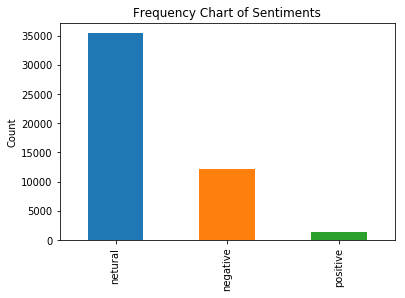

In [275]:
fulldf.sentiment.value_counts().plot(kind='bar', title = 'Frequency Chart of Sentiments')
plt.ylabel('Count')
plt.show()

In [302]:
fulldf.sentiment.value_counts()/len(fulldf)

netural     0.723837
negative    0.248980
positive    0.027184
Name: sentiment, dtype: float64

#### As one can see, there were more overall tweets from the South and West. The percentages of “neutral”, “negative”, and “positive” by region was consistent with the overall percentages mentioned above. By comparing within region percentages, one can see that the West region had the highest percentages of “negative” tweets and “positive” tweets with the lowest percentage of “neutral” tweets. The Midwest region had the lowest percentage of “positive” tweets.

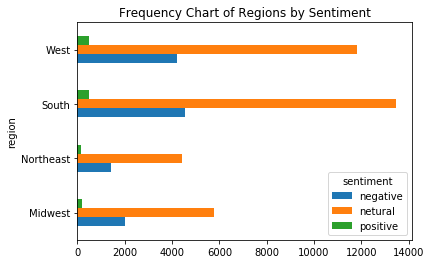

In [301]:
fulldf.groupby('sentiment').region.value_counts().unstack(0).plot.barh(title = 'Frequency Chart of Regions by Sentiment')


In [304]:
sents=fulldf.groupby('sentiment')

In [310]:
sents.region.value_counts()

sentiment  region   
negative   South         4527
           West          4205
           Midwest       2030
           Northeast     1438
netural    South        13477
           West         11811
           Midwest       5774
           Northeast     4406
positive   South          496
           West           484
           Midwest        196
           Northeast      156
Name: region, dtype: int64

In [318]:
len(fulldf.loc[fulldf['region']=='South'])

18500

In [319]:
len(fulldf.loc[fulldf['region']=='West'])

16500

In [320]:
len(fulldf.loc[fulldf['region']=='Midwest'])

8000

In [321]:
len(fulldf.loc[fulldf['region']=='Northeast'])

6000

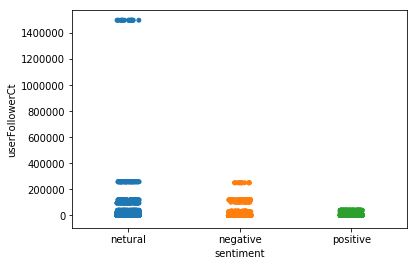

In [278]:
sns.stripplot(x = 'sentiment', y = 'userFollowerCt', data = fulldf, jitter=True)

#### Additionally, as one can see in the following chart, the number of Twitter followers is positively correlated with the number being followed. The relationship is even stronger among those with “negative” sentiments about the President’s immigration position.

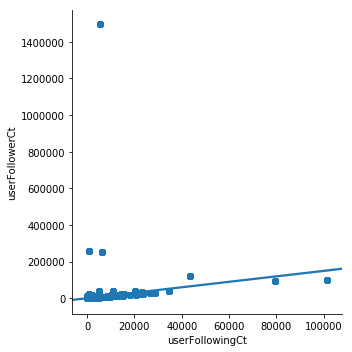

In [284]:
sns.lmplot(x='userFollowingCt', y='userFollowerCt',data=fulldf)

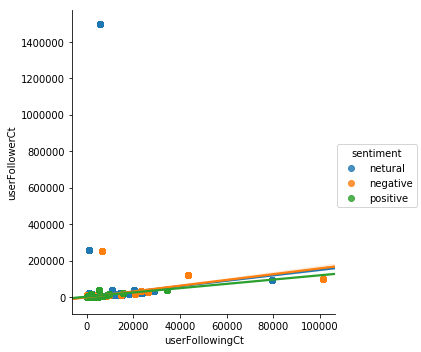

In [283]:
sns.lmplot(x='userFollowingCt', y='userFollowerCt', hue='sentiment',data=fulldf)

#### Moving forward, I intend to further investigate the impact of other variables on one’s sentiment. For example, I would like to see if there are relationships between the other Twitter metadata elements and sentiment. 